# Finding the Optimal Time Window for Detecting RR Interval

In [41]:
import numpy
import matplotlib.pyplot as plt
fps = 30.323427803

In [42]:
def readFromFile(fileName):
    l =numpy.loadtxt(fileName)
    return l[0], l[1], l[2]

In [43]:
def detectPeak(colorL, frameThreshold):
    peakL = list()
    colorlistLen = len(colorL)
    for i in range(1, colorlistLen-1):
        biggerThanPrevious = colorL[i] > colorL[i-1]
        biggerThanAfter = colorL[i] > colorL[i+1]
        #if it is a local maximum, then check if it is a RR peak by comparing its maxima interval to frameThreshold
        if biggerThanPrevious and biggerThanAfter:
            for k in range(2, frameThreshold+1):
                if i-k >= 0:
                    if not colorL[i] > colorL[i-k]:
                        #this is not a rr peak
                        break
                if i+k < colorlistLen:
                    if not colorL[i] > colorL[i+k]:
                        #this is not a rr peak
                        break
            else:
                #this IS a rr peak, store the array index
                peakL.append(i)
    return peakL

In [44]:
def constructRRIntervalList(peakL):
    return [ (peakL[i]-peakL[i-1])/fps for i in range(1, len(peakL))]

This function defines the criteria for being a true RR interval.

In [45]:
def isTrueRRInterval(rrInterval):
    if 0.55 <= rrInterval and rrInterval <= 1.2:
        return True
    else:
        return False

This function detect the amount of errors in a list of RR interval, as judged by function isTrueRRInterval

In [46]:
def getPercentError(rrL):
    errorNum = 0
    for rrInterval in rrL:
        if (not isTrueRRInterval(rrInterval)):
            errorNum += 1
    return 100.0*errorNum/len(rrL) if len(rrL) else 100

This function analyze the rgb txt file of a PPG video and return important information.

In [47]:
def analyzeVideoAndFindPercentErrorList(fileName):
    rErrorL = []
    gErrorL = []
    bErrorL = []
    rL, gL, bL = readFromFile(fileName)
    for frameThreshold in range(1, 26):
        rRRL = constructRRIntervalList(detectPeak(rL, frameThreshold))
        gRRL = constructRRIntervalList(detectPeak(gL, frameThreshold))
        bRRL = constructRRIntervalList(detectPeak(bL, frameThreshold))
        rErrorL.append(getPercentError(rRRL))
        gErrorL.append(getPercentError(gRRL))
        bErrorL.append(getPercentError(bRRL))
    return rErrorL, gErrorL, bErrorL

In [48]:
videoList = ["/home/mong/Desktop/map/map/videos/VID_20150123_172926_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173259_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173329_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173358_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173427_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173457_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173556_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173629_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173700_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173757_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173028_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_172857_Q.mp4.txt"]

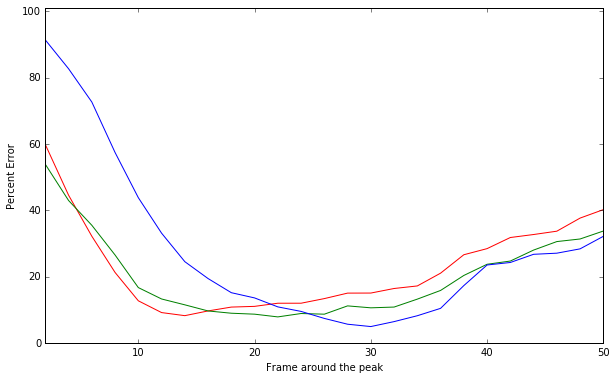

In [49]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
rAvgErrorL = [0 for i in range(0, 25)]
gAvgErrorL = [0 for i in range(0, 25)]
bAvgErrorL = [0 for i in range(0, 25)]
for video in videoList:
    rErrorL, gErrorL, bErrorL = analyzeVideoAndFindPercentErrorList(video)
    for i in range(0, 25):
        rAvgErrorL[i] += rErrorL[i]
        gAvgErrorL[i] += gErrorL[i]
        bAvgErrorL[i] += bErrorL[i]
rAvgErrorL = [totalError/len(videoList) for totalError in rAvgErrorL]
gAvgErrorL = [totalError/len(videoList) for totalError in gAvgErrorL]
bAvgErrorL = [totalError/len(videoList) for totalError in bAvgErrorL]
frameThresholdL = [frameThreshold*2 for frameThreshold in range(1, 26)]
plt.plot(frameThresholdL, rAvgErrorL, color='red')
plt.plot(frameThresholdL, gAvgErrorL, color='green')
plt.plot(frameThresholdL, bAvgErrorL, color='blue')
plt.xlabel("Frame around the peak")
plt.xlim(2, 50)
plt.ylim(0, 101)
plt.ylabel("Percent Error")
plt.show()